# Sonic Brief
<p> In this notebook i wanted to conduct experiments with the Spotify API and more specifically with the user saved songs library. I wanted to cluster my saved songs by their audio analysis and use classification to distinguish them by moods and export them in playlists which were represented by their mood. <br> I broke this task down in five goals in order to accomplish this goal. These are as follows:
    <ol>
        <li>Use Spotify API to acquire user data.</li>
        <li>Selecting and assembling a model for our song clusters. </li>
        <li>Conduct experiments with various classification models to determine the best model.</li>
        <li>Splitting our data and training it with selected cluster and classifcation models.</li>
        <li>Obtain the songs classifications.</li>
        <li>Create and input songs into appropriate playlist by their underlying characteristics.</li>
        <li>Obtain recommended songs and add them to playlists.</li>
    </ol>
    
## Features

<p> I want to briefly detail the features of our dataframes as they characterise the songs by 7 properties. I will use distrbution of values to visulise the features value change by its scale of property.
    <ol>
        <li> <b>Acousticness:</b> This describes how much acoustic instruments are used through out the song besides electrical. Using a chart of distrubtion chart and using a confidence scale from 0 to 1 if the track contains acousticness. 0 showing more electrically produced sounds while 1 relies heavily on acoustic instruments.
            <img src ="imgs/acousticness_variance_chart.png"> </li>
        <li><b>Danceability:</b> The danceability describes how suitable a track is for dancing. This is based on a combination of musical elements; tempo, rhythm, beat and regularity. Viewing the confidence scale of 0 (least danceability) and 1 (most danceability) <img src ="imgs/danceability_variance_chart.png"> </li>
        <li><b>loudness:</b> This describes the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. The distribution of values for loudness look like this:
         <img src ="imgs/loudness_variance_chart.png"> </li>
        <li><b>Energy:</b>Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, Drum and Base has high energy, while a build up to a base drop scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. The distribution of values for energy look like this:  
        <img src ="imgs/energy_variance_chart.png"></li>
        <li><b> Speechiness: </b> peechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. podcast, rap, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. The distribution of values for speechiness like this:
         <img src ="imgs/speechiness_variance_chart.png"></li>
        <li><b> Instrumentalness:</b> Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for instrumentalness look like this: 
        <img src ="imgs/instrumentalness_variance_chart.png"></li>
        <li><b> Liveness: </b>Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. The distribution of values for liveness look like this:

  <img src ="imgs/liveness_variance_chart.png"></li>
        

## Experiment Spotify Dataset
<p>Clusters are going to be derived using the KMeans clustering algorithm, which was trained on Spotify Dataset 1921–2020 found on Kaggle. Spotify Dataset 1921–2020 contains more than 160 000 songs collected from Spotify Web API, and also you can find data grouped by artist, year, or genre in the data section.

In [1]:
#Import spotify API libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util #import libs
##Import necessary libraries for data analysis and machine learning
import pandas as pd
#import torch
import numpy as np

In [2]:
# load Spotify's dataset
df_spotify=pd.read_csv("data_o.csv") 
# first 5 entries
df_spotify.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
#  Describe the dataset.
df_spotify.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


## Feature Preprocessing

In [4]:
# Clean data to show the features were using top describe our songs
X=df_spotify[["acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness"]]
# first 5 entries of clean df
X.head()

,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness
0,0.982,0.279,0.665,0.211,0.878000,-20.096,0.0366
1,0.732,0.819,0.160,0.341,0.000000,-12.441,0.4150
2,0.961,0.328,0.101,0.166,0.913000,-14.850,0.0339
3,0.967,0.275,0.381,0.309,0.000028,-9.316,0.0354
4,0.957,0.418,0.229,0.193,0.000002,-10.096,0.0380


In [5]:
#Normalising Loudness
# loudness is scaled in DB from 0 top to minus 60 db.
# Using scaler MinMaxScaler to change features values to 0,1
from sklearn import preprocessing 
scaler=preprocessing.MinMaxScaler() #init the scaler


In [6]:
# each feature values are in the range [0,1] ,except of loudness is left alone
loudness=X["loudness"].values
# scale it to fit the exact same range
loudness_scaled=scaler.fit_transform(loudness.reshape(-1, 1))
# Set feature loudness to new scale
X["loudness"]=loudness_scaled
features=X.values

<ipython-input-6-3a607ff60106>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["loudness"]=loudness_scaled


## Selecting Model - KMeans
<p> I decided to use the unsupervised learning technique KMeans for my clustering model as i was distributing large amounts of data and grouping by similarity between data points into k groups by calculating the distance between defined centroids.
    <br>
    In order to determine the optimal amount of clusters to use for this dataset i used an <b> Elbow Graph </b> to visualise the optimal value for k by running tests on a range from 1 to 20 clusters. The elbow graph results will tell me what value for k is optimal. 

In [7]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
# optimal k is between 1 and 20 clusters
K = range(1,21)
for k in K:
    # Set model to current iteration of k num of clusters
    model = KMeans(n_clusters=k)
    # Assign Features from spotify dataset
    model = model.fit(features)
    # We calulate the sum of squared distances of our models data by getting the intertia of each convergance
    Sum_of_squared_distances.append(model.inertia_)
    # Print Completed and the current value for k
    print(f'Completed:{k}')

Completed:1
Completed:2
Completed:3
Completed:4
Completed:5
Completed:6
Completed:7
Completed:8
Completed:9
Completed:10
Completed:11
Completed:12
Completed:13
Completed:14
Completed:15
Completed:16
Completed:17
Completed:18
Completed:19
Completed:20


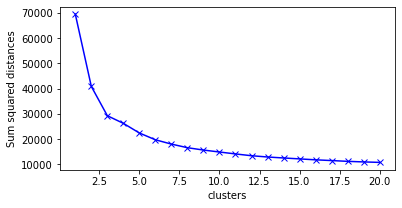

In [8]:
# Elbow method

# Necessary imports for plotting our values
import matplotlib.pyplot as plt 
import seaborn as sns

# Creating the figure of size 6 by 3 inches
plt.figure(figsize=(6,3))
# Plot our array of points from the sum of squared distance by the amount of clusters to generate
plt.plot(list(range(1,21)),Sum_of_squared_distances,'bx-')
# Labels for graph
plt.ylabel('Sum squared distances')
plt.xlabel('clusters')
# Display the Elbow Graph
plt.show()


## Results
<p> From the graph you look for the value where the slop ends but there continuous a momentum of debree which in a clusters case is where decrease in variance and then steady decease. I chose 5 clusters to be the optimal value for k as it had the good score of variance to allow for distinguishing the tracks. I also dont listen to many unique genres and mostly hip hop so i was expecting to see one or two similar cluster scores as spotifys offical playlists also struggle with their currated Daily mix which try to seperate your current music genres into playlists. There is usually one or two similar playlists.  

In [9]:
from sklearn.cluster import KMeans
# Setting our kmeans model to have 5 clusters
model = KMeans(n_clusters=5)
# fit our features to our model
model = model.fit(features)

## Clustering

In [10]:
# make predictions from our feature
predictions=model.predict(features)
# Data for our predicted features
df_spotify['cluster']=predictions
# Display first 5 elements
df_spotify.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,3
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,1
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,3
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,1
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,1


## Visualisation of Clusters
<p> Because there are 7 features for our clusters, this can be very hard to visualise this on any graph. One thing i used was Principle Component Analysis or PCA to reduce the dimensions of our data but keeping the important data.

In [11]:
from sklearn import decomposition
# Set amount of component for decomposising our data.
pca=decomposition.PCA(n_components=2)
# begin transform on our data. Removed Data
pca_result = pca.fit_transform(features)
# Create new dataframe containing our newly fitted data with our predictions
df=pd.DataFrame(pca_result)
df['cluster']=predictions

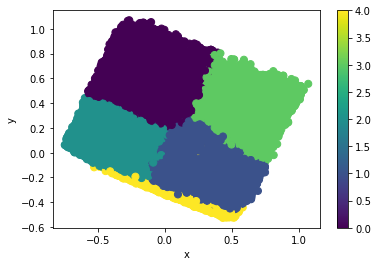

In [12]:
import matplotlib.pyplot as plt
# Create figure
fig = plt.figure()
ax = fig.add_subplot(111)
# Scatter our data onto plot 
scatter = ax.scatter(df.iloc[:,0].values, df.iloc[:,1].values,c=predictions,s=50)
# Labels
ax.set_xlabel('x')
ax.set_ylabel('y')
# Display scattered plot on a colorbar format
plt.colorbar(scatter)

## Results 
<p> As you can tell cluster 2 is the most promident cluster out of the others. 0 being the most difficult to differenciate between other derived clusters. I dont think i had an optimal dispurse between clusters as its not even shapes inside this square.

## Selecting Classifer
<p> I wanted to determing the best model for classifying for recommending songs from spotify dataset or users Saved tracks.

In [13]:
# Selecting features
df_classifier=df_spotify[["acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness","cluster"]]

In [14]:
# Setting up our training data from spotify dataset
X=df_classifier.iloc[:,:-1].values
Y=df_classifier.iloc[:,-1].values

## Split into Train and Test data

In [15]:
# Import libraries for train test split
from sklearn.model_selection import train_test_split
# create our split data into Test and train 
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

In [16]:
# Using our scaler to have our feature length the same
X_train[:,5]=scaler.fit_transform(X_train[:,5].reshape(-1, 1)).reshape(-1,)
X_test[:,5]=scaler.transform(X_test[:,5].reshape(-1, 1)).reshape(-1,)

<p>There are four models i chose to compare against eachother in terms of accuracy. These are KNeighborsClassifier, Naive Bayes, RandomForestClassifier and Support Vector Classifier. Here are The results from the tests.

###  KNeighborsClassifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
acc=[]
for i in range(2,10):
  classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  print(f'{i}:{acc[-1]}')

2:0.9861416307755413
3:0.9895988983621927
4:0.9891301163165451
5:0.9901262781635464
6:0.9902434736749582
7:0.9908294512320178
8:0.9915033254226363
9:0.9912396355219595


### Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
acc=[]

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))
print(f'{i}:{acc[-1]}')

9:0.9607102047991561


### RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
acc=[]
for i in range(5,14):
  classifier = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  print(f'{i}:{acc[-1]}')

5:0.9923822917582257
6:0.9933784536052269
7:0.9931147637045501
8:0.9936128446280508
9:0.9935835457501978
10:0.9939351322844335
11:0.9937886378951686
12:0.9939058334065806
13:0.9937886378951686


### SVC

In [20]:
from sklearn.svm import SVC
acc=[]
for i in ['linear', 'poly', 'rbf']:
  classifier = SVC(kernel = i, random_state = 0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  print(f'{i}:{acc[-1]}')

linear:0.9983592628402332
poly:0.9987694471301749
rbf:0.9982713662066743


### Conclusion
<p>Support Vector Classifier turned out to be the best model in terms of accuracy of 0.9978, so I decided to use SVC as our classifer for recommending songs from Spotify dataset or from the users saved tracks.

In [21]:
classifier = SVC(kernel ='poly', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Confusion Matrix Visualisation
<p> Summary of the predictions with the SVC for futher inspection 

In [22]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 1640     1     4     1     0]
 [    2 11913     8     7     0]
 [    2     0 14669     0     2]
 [    5     5     0  4847     0]
 [    1     3     1     0  1020]]


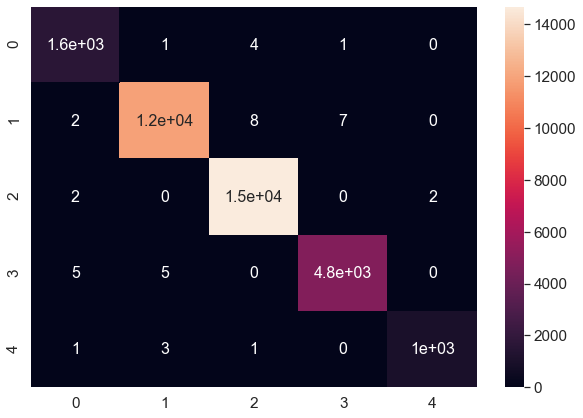

In [23]:
df_cm = pd.DataFrame(cm, range(5), range(5))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

## Cluster Test

In [24]:
df=df_spotify[["id","acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness","cluster"]]

In [25]:
cluster_info=[]
for i in range(5):
    cluster_info.append(df[df['cluster']==i].describe().iloc[1,:])

In [26]:
cluster_info

[acousticness         0.149077
 danceability         0.503332
 liveness             0.224851
 energy               0.684809
 instrumentalness     0.712233
 loudness           -10.137863
 speechiness          0.061496
 cluster              0.000000
 Name: mean, dtype: float64,
 acousticness         0.802425
 danceability         0.509093
 liveness             0.203586
 energy               0.321395
 instrumentalness     0.031333
 loudness           -12.870708
 speechiness          0.064136
 cluster              1.000000
 Name: mean, dtype: float64,
 acousticness        0.153353
 danceability        0.593111
 liveness            0.206926
 energy              0.694118
 instrumentalness    0.016013
 loudness           -7.842742
 speechiness         0.084869
 cluster             2.000000
 Name: mean, dtype: float64,
 acousticness         0.928916
 danceability         0.419064
 liveness             0.179440
 energy               0.223654
 instrumentalness     0.815136
 loudness           -1

## Analysing Results
<p> The first Cluster detailed a result of speechiness mean value of all songs in its cluster was 0.87. One can presume that if the mean speechiness of a song is above 0.66, the song consists of spoken words and if the speechiness score is between 0.33 and 0.66, this is a song that may contain both music and words, and a speechiness score below 0.33  means the song does not have any speech, it contains a higher instrumentalness. Furthermore, if the score in instrumentalness is less that 0.60 but high in speechiness and danceability, more that 0.60 I assumed these songs were more hip hop.
<br> The second Cluster is relatively high in accoustiveness and speechiness but low in instrumentalness and energy was around 0.60. I expect to see a lot of sad, relaxing songs here.
<br>The third Cluster was similar to the second but with more instrumental so i am expecting more classical music in this cluster.
<br>The fourth Cluster  is the highest in speechiness and dancability but the lowest in instrumentalness. I was expecting to see Rock or Alternative Rockl/Indie music in this cluster.
<br>For the final Cluster, there was an even score on acousticness, dancability and energy. I presumed pop or dance music was going to the cluster of songs.

## Predicting User saved Songs 
<p>Here is where i use the spotify api to gain a client access, not requiring a token for refresh. For this notebook i did this because i didnt have time to implement authentification flow but i implemented this in the web application.

In [27]:
# Imports Spotipy 
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

In [28]:
# Client ID
cid ='616278c94375429084e241be7cef4949' 
# Client Secret
secret = 'dbe93ff256e74afb83bceeb59f33fb4b'
# Spotify username
username = 'dylan.hannon' 
# Scope
scope = 'user-library-read playlist-modify-public playlist-read-private user-top-read playlist-modify-private user-read-currently-playing'
# Redirect uri for spotify dashboard
redirect_uri='http://localhost.com/callback/'
# Credentials manager from spotipy making it easy to create client flow easy with spotify api
client_credentials_manager = spotipy.oauth2.SpotifyOAuth(scope=scope, username=username,client_id=cid, client_secret=secret, redirect_uri=redirect_uri, cache_path='./tokens.txt')

# Init instance of spotify connection of user account
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [29]:
# Gaining Saved tracks 
offset = 0
songs = []
names = []
ids = []
while True:
    content = sp.current_user_saved_tracks(limit=50, offset=offset)
    songs += content['items']
    if content['next'] is not None:
        offset += 100
    else:
        break
for i in songs:
    names.append(i['track']['name'])
    ids.append(i['track']['id'])
index=0
# Audio features of song
audio_features=[]
while index < len(ids):
    audio_features += sp.audio_features(ids[index:index + 50])
    index += 50
features_list = []
for features in audio_features:
    features_list.append([features['acousticness'], features['danceability'],
                          features['liveness'],features['energy'],
                          features['instrumentalness'], features['loudness'],
                          features['speechiness']])

# Create dataframe with user tracks and recording their audio analysis as columns
df_user_saved_tracks = pd.DataFrame(features_list, columns=["acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness"],index=ids)

In [30]:
df_user_saved_tracks.head()

,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness
5hOrYYtUd96bIOBjuSEArP,0.4820,0.912,0.107,0.596,0.000369,-9.959,0.4510
3zEN0ii6s4DHHBpnTp3RP7,0.0801,0.675,0.422,0.781,0.014300,-5.404,0.0306
5STdMlrBf6pqWiNE7WqxSi,0.0143,0.589,0.140,0.827,0.001510,-2.938,0.3840
2wxO3ZydJTZRi4Bbc02q7i,0.0498,0.700,0.160,0.402,0.000001,-9.930,0.2780
4ezafcOuI5em8LoE2xxnpv,0.0541,0.724,0.314,0.806,0.000000,-6.843,0.2950


## Feature Preprocessing - User Saved Tracks


In [31]:
# Normalisation of loudness from 0 tp -60 db to 0,1
loudness=df_user_saved_tracks['loudness'].values
loudness_scaled=scaler.fit_transform(loudness.reshape(-1,1))
df_user_saved_tracks['loudness']=loudness_scaled

In [32]:
features=df_user_saved_tracks.values

## Classification

In [33]:
# Finally using our SVC classifer we use to classify my saved tracks into clusters
predictions=classifier.predict(features)
df_user_saved_tracks['cluster']=predictions

# The scope of these changes made to
# pandas settings are local to with statement.
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    # Show predicted classification of tracks
    display(df_user_saved_tracks)

,acousticness,danceability,liveness,energy,instrumentalness,loudness,speechiness,cluster
5hOrYYtUd96bIOBjuSEArP,4.820e-01,0.912,0.107,0.596,3.690e-04,0.622,0.451,4
3zEN0ii6s4DHHBpnTp3RP7,8.010e-02,0.675,0.422,0.781,1.430e-02,0.819,0.031,2
5STdMlrBf6pqWiNE7WqxSi,1.430e-02,0.589,0.140,0.827,1.510e-03,0.926,0.384,2
2wxO3ZydJTZRi4Bbc02q7i,4.980e-02,0.700,0.160,0.402,1.040e-06,0.623,0.278,2
4ezafcOuI5em8LoE2xxnpv,5.410e-02,0.724,0.314,0.806,0.000e+00,0.757,0.295,2
2jKoVlU7VAmExKJ1Jh3w9P,1.800e-01,0.893,0.060,0.514,0.000e+00,0.833,0.283,2
4R6oOgh523J4M1I0XYe14f,1.220e-01,0.578,0.118,0.423,8.690e-04,0.637,0.176,2
31I3Rt1bPa2LrE74DdNizO,3.810e-02,0.639,0.386,0.628,0.000e+00,0.725,0.040,2
6mwZS6fLcQP1wKv3HN3OcY,1.380e-02,0.728,0.086,0.697,8.290e-06,0.831,0.037,2
2sGSId790ABFzGXx9VEdwl,1.370e-01,0.671,0.311,0.852,0.000e+00,0.909,0.272,2


## Sorting User Saved Tracks and inserting them into appropriate playlists via genre

Here i sort my saved tracks by the  clusters into appropriate playlists corresponding to the genre


In [34]:
# From knowing my music taste and listening to some tracks by search them with their id
# I distinguised that these were my moods/ genres that i would be classifying my data into
moods=['rap','Rock / Alternative Rock ', 'Hip/Hop','/ Indie','folk/ pop'] 


In [35]:
# Create list containing the index of songs and the feature
clustered_songs=list(zip(df_user_saved_tracks.index,df_user_saved_tracks.iloc[:,-1]))

In [36]:
# Create 5 empty arrays for each cluster
sorted_songs=[[],[],[],[],[]]
for i in range(len(clustered_songs)):
    # Add corresponding features of each cluster to respected array.
    sorted_songs[clustered_songs[i][1]].append(clustered_songs[i][0])

In [37]:
#Create 5 playlists
playlists=[]
for i in range(5):
    # create playlists for a corresponding cluster 
    playlist_created=sp.user_playlist_create(username, name="Cluster "+str(i), public=False,description='')
     # add new songs
    sp.user_playlist_add_tracks(username,playlist_created['id'],sorted_songs[i][:100])
    playlists.append(playlist_created)

len_clusters=[]
for i in range(5):
    len_clusters.append(len(df_user_saved_tracks[df_user_saved_tracks['cluster']==i].values))



## Description of User saved songs

<p> I concluded that the vast majority of my saved songs are high in loudness and dancibility meaning that i listen to a lot of hip/hop and EDM tracks


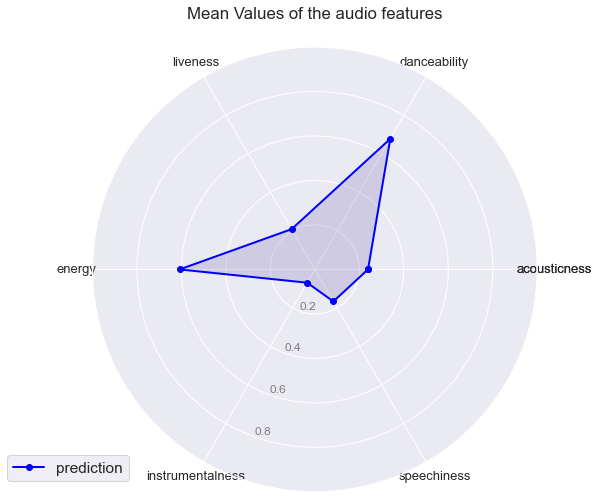

In [38]:
# Assigning features as labels for graph.
labels= ["acousticness", "danceability", "liveness","energy", "instrumentalness", "speechiness"]
# Obtaining the mean of the each feature in our dataframe.
stats= df_user_saved_tracks[ ["acousticness", "danceability", "liveness","energy", "instrumentalness", "speechiness"]].mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
labels=np.concatenate((labels,[labels[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

# Plotting our points
ax = fig.add_subplot(221, polar=True)
# Plot lines between points
ax.plot(angles, stats, 'o-', linewidth=2, label = "prediction", color= 'blue')
# Fill inside of connected points with same color but with opacity 
ax.fill(angles, stats, alpha=0.25, facecolor='m')
# Create grid with angle between our points
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


# Labels
ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

# Title
ax.set_title('Mean Values of the audio features')
ax.grid(True)

# Legend 
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

## Results
<p> For this Spider chart or radio chart i wanted to showcase the mean value of the audio features from each song in my liked playlist. As you can see i listen to a lot of high energy ranging in the .60 and in danceability being the highest with over .60 as its mean. I rarely listen to live concerts or tracks, most of my songs are not acousic in nature, i also barely listen to any spoken word songs like poetry and finally instrumentalness is the absense of speech and solely just the instrumental sound playing which is the lowest because i rarely listen to these lofi songs.

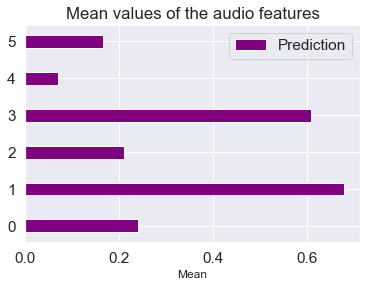

In [39]:
from matplotlib import style
# Number of features
N = len(df_user_saved_tracks[ ["acousticness", "danceability", "liveness","energy", "instrumentalness", "speechiness"]].mean())
# Array with the number of features
ind = np.arange(N) 

width = 0.35  
#Bar plot with my list
plt.barh(ind, df_user_saved_tracks[ ["acousticness", "danceability", "liveness","energy", "instrumentalness", "speechiness"]].mean() , width, label='Prediction', color = 'purple')


#X- label
plt.xlabel('Mean', fontsize = 12)
# Title
plt.title('Mean values of the audio features')

#legend
plt.legend(loc='best')
# Figure size
plt.rcParams['figure.figsize'] =(8,8)
# Set style
style.use("ggplot")

plt.show()

In [40]:
print('my saved songs:')
pers=[]
# Desribe our clustes and how occuring the moods are in our overal mean
for i in range(5):
    pers.append(float(len_clusters[i]/sum(len_clusters)))
    print(moods[i],float(len_clusters[i]/sum(len_clusters)))

my saved songs:
rap 0.06318681318681318
Rock / Alternative Rock  0.16346153846153846
Hip/Hop 0.7348901098901099
/ Indie 0.013736263736263736
folk/ pop 0.024725274725274724


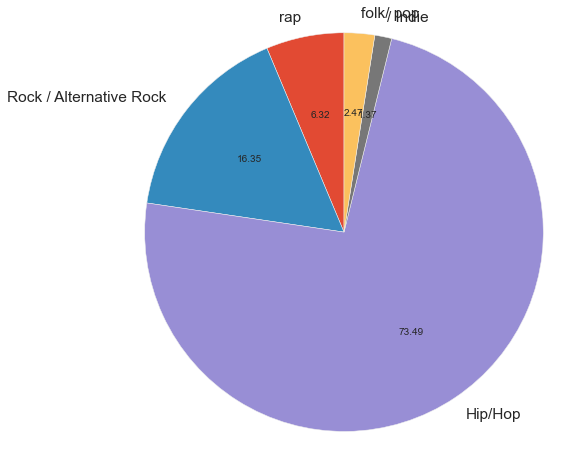

In [41]:
# import the pyplot library

import matplotlib.pyplot as plot

# Objects for pie Chart
figureObject, axesObject = plot.subplots()

# Draw the pie chart

axesObject.pie(pers,labels=moods,autopct='%1.2f',startangle=90)

# Aspect ratio - equal for pie

axesObject.axis('equal')

# Show piechart
plot.show()

## Obtaining Recommended songs and add to Playlist


In [42]:
df_user_saved_tracks.index

Index(['5hOrYYtUd96bIOBjuSEArP', '3zEN0ii6s4DHHBpnTp3RP7',
       '5STdMlrBf6pqWiNE7WqxSi', '2wxO3ZydJTZRi4Bbc02q7i',
       '4ezafcOuI5em8LoE2xxnpv', '2jKoVlU7VAmExKJ1Jh3w9P',
       '4R6oOgh523J4M1I0XYe14f', '31I3Rt1bPa2LrE74DdNizO',
       '6mwZS6fLcQP1wKv3HN3OcY', '2sGSId790ABFzGXx9VEdwl',
       ...
       '6yvCDtFjl77AfWZtWnKyky', '1JK34fN2kQYPxmkkHFKA5v',
       '2qLgVrG9RSSsLBfYkUIWDW', '4qtGqWvVvliy8oR2uYqIlO',
       '6K9cjIloubdwJxwxrDcETI', '17f7vVLfZlSvoCTE0cfcBG',
       '1ckIV7AQk579TO4rDPp3Sj', '1UzofFX5AkfTDnwjcBkM4J',
       '5Y2Fwkw3aUU4VfAWXhHbfJ', '4v7zlBmIQU4lszrokRt8yP'],
      dtype='object', length=728)

In [43]:
# Array for all recommended tracks
rec_tracks = []
for i in df_user_saved_tracks.index.tolist():
    # Use spotifys recommendations using a seed from our index from 
    rec_tracks += sp.recommendations(seed_tracks=[i], limit=5)['tracks'] 

# Array for track ids and names
rec_track_ids = []
rec_track_names = []
for i in rec_tracks:
    # Obtain id of track
    rec_track_ids.append(i['id']) 
    # Obtain name of track
    rec_track_names.append(i['name'])

# Array for storing the freatures for tracks
rec_features = []
for i in range(0,len(rec_track_ids)):
    # Obtain features from recommended songs
    rec_audio_features = sp.audio_features(rec_track_ids[i]) 
    for track in rec_audio_features:
        rec_features.append(track)

# Make a dataframe        
rec_playlist_df = pd.DataFrame(rec_features, index = rec_track_ids) 

In [44]:
# Display recommended songs
rec_playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
6jL1SnyXcXiKOmw4M2RnmT,0.620,0.4450,1,-17.154,0,0.3820,0.002730,0.014500,0.3330,0.587,202.134,audio_features,6jL1SnyXcXiKOmw4M2RnmT,spotify:track:6jL1SnyXcXiKOmw4M2RnmT,https://api.spotify.com/v1/tracks/6jL1SnyXcXiK...,https://api.spotify.com/v1/audio-analysis/6jL1...,248493,4
6vV1NDCjh2afFgQ9Vb7i86,0.730,0.8800,11,-3.688,0,0.0666,0.136000,0.130000,0.5190,0.814,94.295,audio_features,6vV1NDCjh2afFgQ9Vb7i86,spotify:track:6vV1NDCjh2afFgQ9Vb7i86,https://api.spotify.com/v1/tracks/6vV1NDCjh2af...,https://api.spotify.com/v1/audio-analysis/6vV1...,267267,4
0Sizq91V0brNa9RBpMfeOB,0.727,0.6610,6,-4.992,0,0.0731,0.355000,0.000000,0.3000,0.511,84.974,audio_features,0Sizq91V0brNa9RBpMfeOB,spotify:track:0Sizq91V0brNa9RBpMfeOB,https://api.spotify.com/v1/tracks/0Sizq91V0brN...,https://api.spotify.com/v1/audio-analysis/0Siz...,345067,4
627vP3nl9eI4xF4yEQEyze,0.254,0.6930,10,-8.435,0,0.0929,0.787000,0.000000,0.3310,0.812,173.459,audio_features,627vP3nl9eI4xF4yEQEyze,spotify:track:627vP3nl9eI4xF4yEQEyze,https://api.spotify.com/v1/tracks/627vP3nl9eI4...,https://api.spotify.com/v1/audio-analysis/627v...,320813,4
41bIQPBE1lFN0mmw6Lmssz,0.576,0.8070,6,-3.908,0,0.3170,0.353000,0.000363,0.0512,0.908,90.012,audio_features,41bIQPBE1lFN0mmw6Lmssz,spotify:track:41bIQPBE1lFN0mmw6Lmssz,https://api.spotify.com/v1/tracks/41bIQPBE1lFN...,https://api.spotify.com/v1/audio-analysis/41bI...,224427,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1MNCJ2DZCo9N1nnT8dONjq,0.415,0.8250,2,-4.668,1,0.1080,0.022400,0.000010,0.2310,0.606,138.195,audio_features,1MNCJ2DZCo9N1nnT8dONjq,spotify:track:1MNCJ2DZCo9N1nnT8dONjq,https://api.spotify.com/v1/tracks/1MNCJ2DZCo9N...,https://api.spotify.com/v1/audio-analysis/1MNC...,193831,3
2UNCshSCUwlO9dbxrV8eMo,0.386,0.3440,2,-11.012,1,0.0299,0.670000,0.000321,0.0989,0.288,90.469,audio_features,2UNCshSCUwlO9dbxrV8eMo,spotify:track:2UNCshSCUwlO9dbxrV8eMo,https://api.spotify.com/v1/tracks/2UNCshSCUwlO...,https://api.spotify.com/v1/audio-analysis/2UNC...,242400,4
6puGVtKwILkssOLBywphhl,0.441,0.1520,6,-13.509,1,0.0285,0.529000,0.000005,0.0874,0.292,136.572,audio_features,6puGVtKwILkssOLBywphhl,spotify:track:6puGVtKwILkssOLBywphhl,https://api.spotify.com/v1/tracks/6puGVtKwILks...,https://api.spotify.com/v1/audio-analysis/6puG...,252120,4
0GLAcNuGMgKBMrNZRNsVT9,0.546,0.0458,11,-14.928,0,0.0440,0.969000,0.000002,0.0742,0.357,103.633,audio_features,0GLAcNuGMgKBMrNZRNsVT9,spotify:track:0GLAcNuGMgKBMrNZRNsVT9,https://api.spotify.com/v1/tracks/0GLAcNuGMgKB...,https://api.spotify.com/v1/audio-analysis/0GLA...,199973,3


## Preprocessing - Recommended Tracks

In [45]:
# Normalising loudness 
loudness=rec_playlist_df['loudness'].values
loudness_scaled=scaler.fit_transform(loudness.reshape(-1,1))
rec_playlist_df['loudness']=loudness_scaled

In [46]:
X=rec_playlist_df[["acousticness", "danceability", "liveness","energy", "instrumentalness", "loudness", "speechiness"]].values

## Classification of Recommdended Tracks

In [47]:
# Finally using our SVC classifer we use to classify my saved tracks into clusters
clusters=classifier.predict(X)
rec_playlist_df['cluster']=clusters

# Display recommended tracks dataframe
rec_playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
6jL1SnyXcXiKOmw4M2RnmT,0.620,0.4450,1,0.328257,0,0.3820,0.002730,0.014500,0.3330,0.587,202.134,audio_features,6jL1SnyXcXiKOmw4M2RnmT,spotify:track:6jL1SnyXcXiKOmw4M2RnmT,https://api.spotify.com/v1/tracks/6jL1SnyXcXiK...,https://api.spotify.com/v1/audio-analysis/6jL1...,248493,4,2
6vV1NDCjh2afFgQ9Vb7i86,0.730,0.8800,11,0.866467,0,0.0666,0.136000,0.130000,0.5190,0.814,94.295,audio_features,6vV1NDCjh2afFgQ9Vb7i86,spotify:track:6vV1NDCjh2afFgQ9Vb7i86,https://api.spotify.com/v1/tracks/6vV1NDCjh2af...,https://api.spotify.com/v1/audio-analysis/6vV1...,267267,4,2
0Sizq91V0brNa9RBpMfeOB,0.727,0.6610,6,0.814349,0,0.0731,0.355000,0.000000,0.3000,0.511,84.974,audio_features,0Sizq91V0brNa9RBpMfeOB,spotify:track:0Sizq91V0brNa9RBpMfeOB,https://api.spotify.com/v1/tracks/0Sizq91V0brN...,https://api.spotify.com/v1/audio-analysis/0Siz...,345067,4,2
627vP3nl9eI4xF4yEQEyze,0.254,0.6930,10,0.676739,0,0.0929,0.787000,0.000000,0.3310,0.812,173.459,audio_features,627vP3nl9eI4xF4yEQEyze,spotify:track:627vP3nl9eI4xF4yEQEyze,https://api.spotify.com/v1/tracks/627vP3nl9eI4...,https://api.spotify.com/v1/audio-analysis/627v...,320813,4,1
41bIQPBE1lFN0mmw6Lmssz,0.576,0.8070,6,0.857674,0,0.3170,0.353000,0.000363,0.0512,0.908,90.012,audio_features,41bIQPBE1lFN0mmw6Lmssz,spotify:track:41bIQPBE1lFN0mmw6Lmssz,https://api.spotify.com/v1/tracks/41bIQPBE1lFN...,https://api.spotify.com/v1/audio-analysis/41bI...,224427,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1MNCJ2DZCo9N1nnT8dONjq,0.415,0.8250,2,0.827298,1,0.1080,0.022400,0.000010,0.2310,0.606,138.195,audio_features,1MNCJ2DZCo9N1nnT8dONjq,spotify:track:1MNCJ2DZCo9N1nnT8dONjq,https://api.spotify.com/v1/tracks/1MNCJ2DZCo9N...,https://api.spotify.com/v1/audio-analysis/1MNC...,193831,3,2
2UNCshSCUwlO9dbxrV8eMo,0.386,0.3440,2,0.573741,1,0.0299,0.670000,0.000321,0.0989,0.288,90.469,audio_features,2UNCshSCUwlO9dbxrV8eMo,spotify:track:2UNCshSCUwlO9dbxrV8eMo,https://api.spotify.com/v1/tracks/2UNCshSCUwlO...,https://api.spotify.com/v1/audio-analysis/2UNC...,242400,4,1
6puGVtKwILkssOLBywphhl,0.441,0.1520,6,0.473941,1,0.0285,0.529000,0.000005,0.0874,0.292,136.572,audio_features,6puGVtKwILkssOLBywphhl,spotify:track:6puGVtKwILkssOLBywphhl,https://api.spotify.com/v1/tracks/6puGVtKwILks...,https://api.spotify.com/v1/audio-analysis/6puG...,252120,4,1
0GLAcNuGMgKBMrNZRNsVT9,0.546,0.0458,11,0.417226,0,0.0440,0.969000,0.000002,0.0742,0.357,103.633,audio_features,0GLAcNuGMgKBMrNZRNsVT9,spotify:track:0GLAcNuGMgKBMrNZRNsVT9,https://api.spotify.com/v1/tracks/0GLAcNuGMgKB...,https://api.spotify.com/v1/audio-analysis/0GLA...,199973,3,1


## Adding Classified Songs to our Playlists


In [48]:
# Create list containing the index of songs and the feature
clustered_songs=list(zip(rec_playlist_df.index,rec_playlist_df.iloc[:,-1]))
# Create 5 empty arrays for each cluster
sorted_songs=[[],[],[],[],[]]
for i in range(len(clustered_songs)):
    # Add corresponding features of each cluster to respected array.
    sorted_songs[clustered_songs[i][1]].append(clustered_songs[i][0])

for i in range(5):
    #add new songs to existing playlists
    sp.user_playlist_add_tracks(username,playlists[i]['id'],sorted_songs[i][:100]) 
# view final score of what songs were added to what cluster based on recommended
rec_playlist_df['cluster'].value_counts()


2    2960
1     435
0     167
4      52
3      26
Name: cluster, dtype: int64